# <------------------------ Happy Independence Day ------------------------>

# Clustering with K-Means

In [226]:
# import libraries
import pandas as pd

### Load Dataset

In [227]:
dataset = pd .read_csv('Mall_Customers.csv')

### Look Dataset

In [228]:
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### Shape Dataset

In [229]:
dataset.shape

(200, 5)

### Check null value present in Dataset

In [230]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Check data type of each column

In [231]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Check duplicate value present in dataset

In [232]:
dataset.duplicated().sum()

np.int64(0)

### Remove CustomerID

In [233]:
dataset.drop(columns='CustomerID',inplace=True)

# EDA

In [234]:
from matplotlib import pyplot as plt
import seaborn as sns

### Pair plot

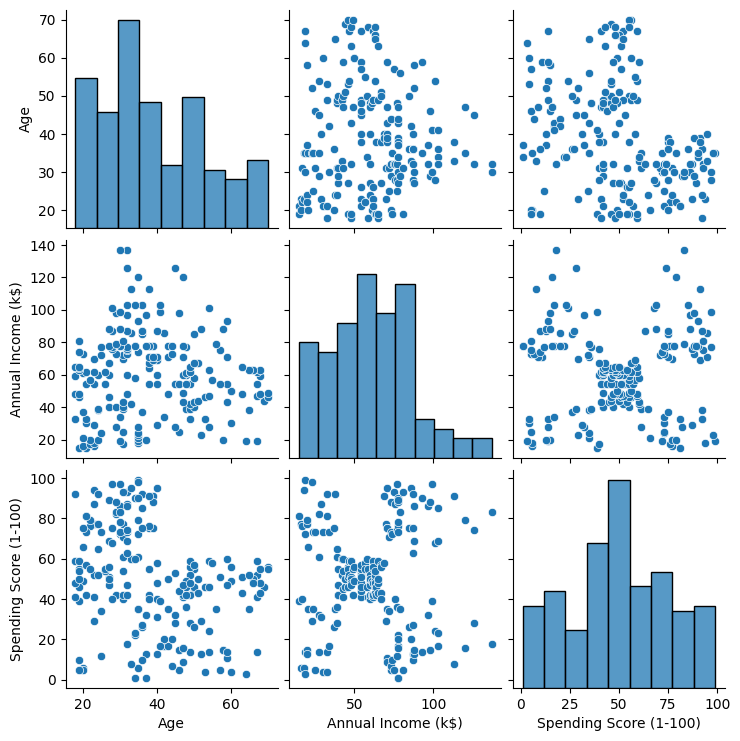

In [235]:
sns.pairplot(data = dataset)
plt.show()

### Encoding Gender Column

In [236]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Gender'] = encoder.fit_transform(dataset['Gender'])

# Create Cluster

In [237]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2,21):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)

### Use the Elbow Method to find optimal K

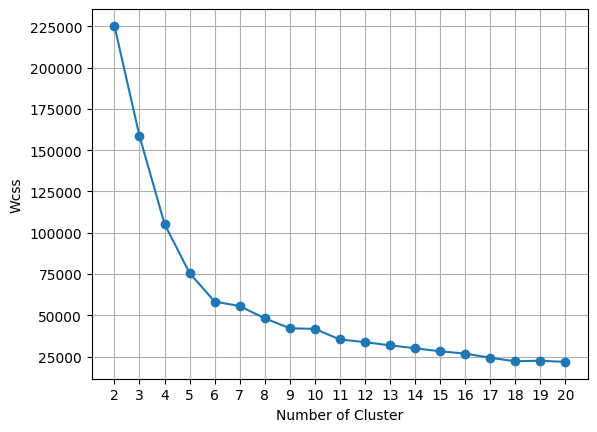

In [238]:
plt.plot([i for i in range(2,21)],wcss,marker='o')
plt.grid(axis='both')
plt.xlabel('Number of Cluster')
plt.ylabel('Wcss')
plt.xticks([i for i in range(2,21)])
plt.show()

# Fit model on best k value

In [239]:
km1 = KMeans(n_clusters=6,init='k-means++')
dataset['Predict'] = km1.fit_predict(dataset)

### Check Labels

In [240]:
km.labels_

array([ 9,  4,  9,  4, 15,  4,  5, 16,  5,  4,  5, 16,  5,  4,  5,  4, 15,
        4, 17, 16, 15,  4,  5,  4,  5, 16, 15, 12, 15, 16,  5,  4,  5, 16,
        5, 16,  5,  4, 15,  4, 17, 16, 17, 12, 17, 12, 13, 12, 15, 15, 13,
       12, 12, 13, 17, 17, 13, 13, 12, 13, 13, 12, 13, 13, 13, 12,  1, 13,
       12, 12, 13,  1, 13, 13,  6,  8,  1,  1,  8,  1,  6,  1,  6,  1,  8,
        1,  6,  8,  1,  1,  6,  8,  1,  1,  8,  8,  1,  8,  1,  8,  8,  1,
        6,  8,  1,  8,  6,  6,  6,  6,  6,  8, 18,  8,  8,  8,  6,  1, 18,
        1,  8, 18,  1, 19,  8, 14, 18, 19,  3, 14,  7, 14,  8, 14,  7, 19,
        7, 14,  7, 14,  3, 19,  8, 19,  7, 19, 18, 14,  7, 19,  3, 19,  3,
       14,  3, 19,  7, 14,  7, 14, 18, 19,  7, 19,  3, 10,  3,  2,  3, 10,
        3, 10,  7,  2,  3,  2,  3, 10,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       10,  3,  2,  3, 10, 11,  0, 11,  0, 11,  0, 11,  0], dtype=int32)

### Look Dataset

In [241]:
dataset.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Predict
137,1,32,73,73,3
169,1,32,87,63,3
146,1,48,77,36,1
66,0,43,48,50,0
90,0,68,59,55,0
166,1,42,86,20,1
139,0,35,74,72,3
24,0,54,28,14,5
13,0,24,20,77,4
25,1,29,28,82,4


# Silhoultte Score

In [242]:
from sklearn.metrics import silhouette_score
silhouette_score(dataset,labels=km1.labels_)

0.4273069025763067

# Visualize clusters with color-coding.

In [253]:
# Define custom colors for each hue category
custom_palette = {
    0: "#E6194B",  # Bright Red
    1: "#3CB44B",  # Bright Green
    2: "#4363D8",  # Strong Blue
    3: "#FFBF00",  # Vivid Amber/Orange
    4: "#F032E6",  # Bright Pink/Magenta
    5: "#A52A2A"   # Strong Brownish Purple
}

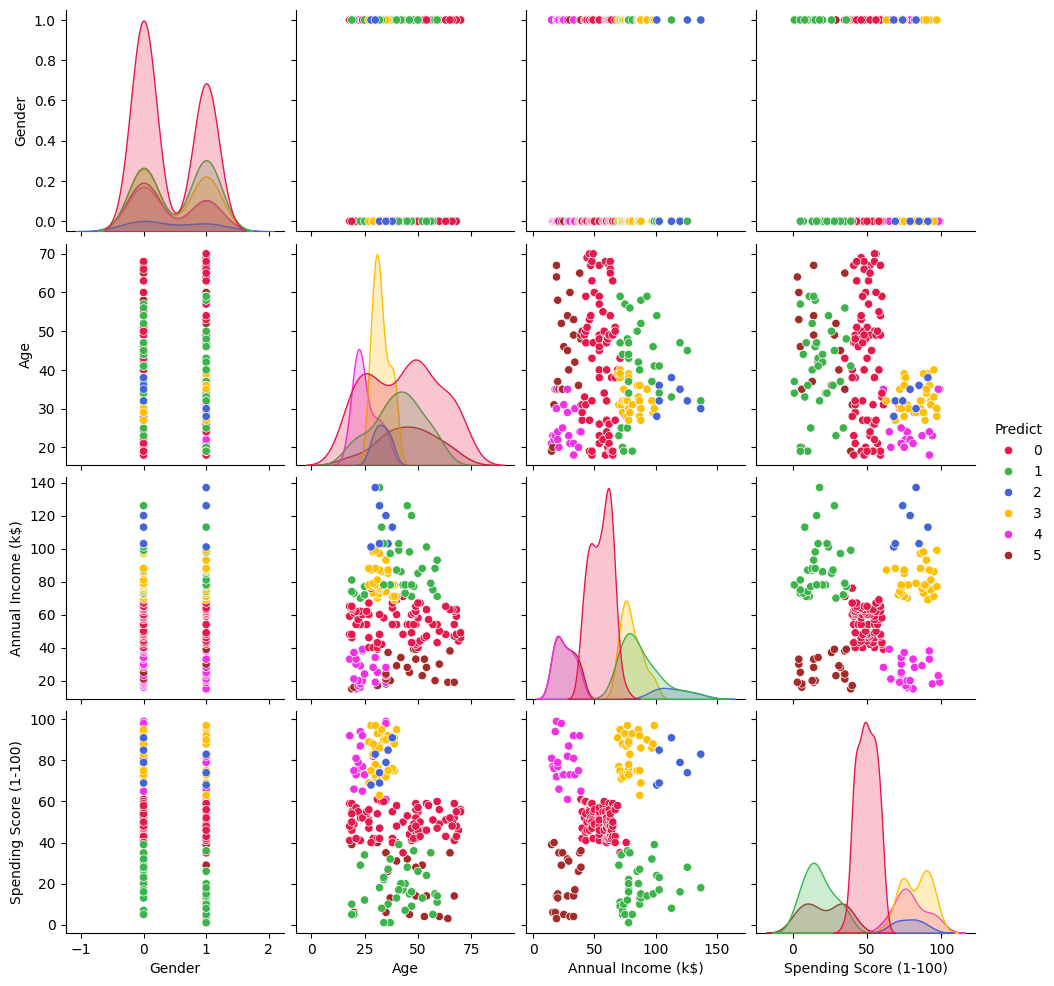

In [254]:
sns.pairplot(data = dataset,hue='Predict',palette=custom_palette)
plt.show()

# Evaluate clustering using Silhouette Score

In [244]:
silh_sco = []
n_clus = [j for j in range(2,21)]
for i in range(2,21):
    km2 = KMeans(n_clusters=i,init='k-means++')
    km2.fit(dataset)
    silh_sco.append(silhouette_score(dataset,km2.labels_))

### Graph of no. of clustering Vs Silhouette Score

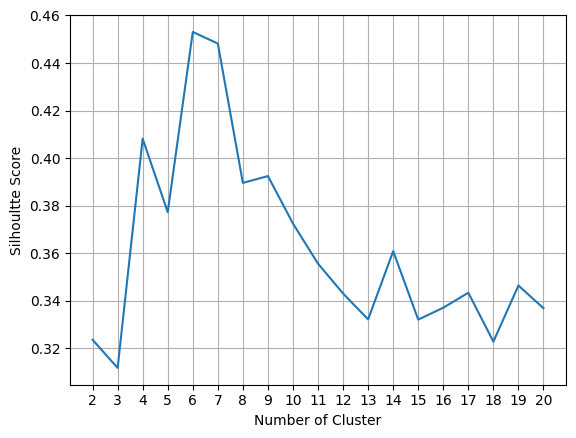

In [245]:
plt.plot(n_clus,silh_sco)
plt.grid(axis='both')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoultte Score')
plt.xticks([i for i in range(2,21)])
plt.show()